# 趋势回调策略 (Trend Pullback)

In [1]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print('⚔️ 正在融合 MA 与 RSI 战法...')
df = ak.fund_open_fund_info_em(symbol="012363", indicator="单位净值走势")
df['date'] = pd.to_datetime(df['净值日期'])
df['price'] = pd.to_numeric(df['单位净值'])
df = df.sort_values('date').set_index('date')
df = df.tail(252)

⚔️ 正在融合 MA 与 RSI 战法...


In [4]:
df['MA20'] = df['price'].rolling(20).mean()
change = df['price'].diff()
gain = change.clip(lower=0)
loss = change.clip(upper=0).abs()
avg_gain = gain.ewm(alpha=1/14,adjust=False).mean()
avg_loss = loss.ewm(alpha=1/14,adjust=False).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100/(1+rs))
trend_up = df['price'] > df['MA20']
rsi_dip = df['RSI'] < 45
perfect_buy = trend_up&rsi_dip



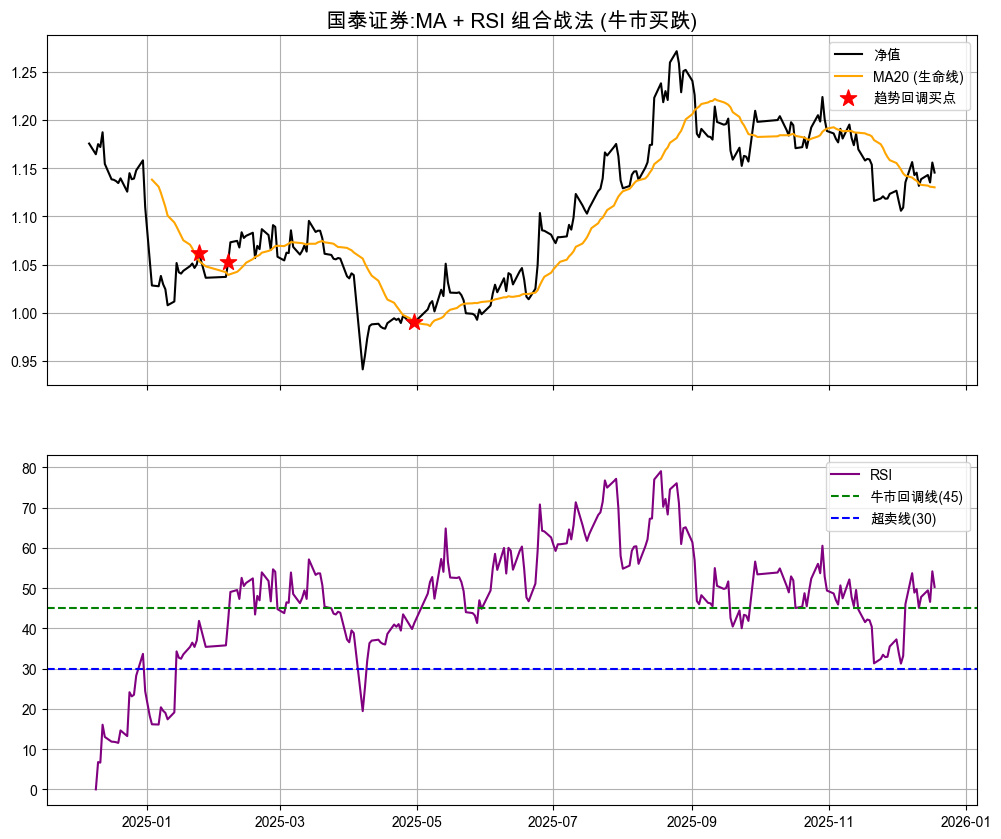

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10),sharex=True)
ax1.plot(df.index ,df['price'],label = '净值',color = 'black')
ax1.plot(df.index,df['MA20'],label = 'MA20 (生命线)',color = 'orange')
ax1.scatter(df.loc[perfect_buy].index,df.loc[perfect_buy]['price'],color = 'red',marker='*',s=150,label = '趋势回调买点',zorder=5)
ax1.set_title('国泰证券:MA + RSI 组合战法 (牛市买跌)',fontsize = 15)
ax1.legend()
ax1.grid(True)
ax2.plot(df.index,df['RSI'],color='purple',label='RSI')
ax2.axhline(45,color='green',linestyle='--',label='牛市回调线(45)')
ax2.axhline(30,color='blue',linestyle='--',label='超卖线(30)')
ax2.legend()
ax2.grid(True)
plt.show()

In [9]:
last_signal =df[perfect_buy].index[-1]
print(f'🕵️‍♂️ 最近一次【完美买点】出现在:{last_signal.date()}')
print('策略逻辑：价格在20日线之上(强) + RSI回调到45以下(便宜)')


🕵️‍♂️ 最近一次【完美买点】出现在:2025-04-30
策略逻辑：价格在20日线之上(强) + RSI回调到45以下(便宜)
